# SI 370 - Homework #1: Data Manipulation and Preliminary Analyses

Kelsey Toporski, ktops

## Background

This homework assignment focuses on the exploration and analysis of historical data from the Olympic games.  The description of the data includes the following:
> This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. I scraped this data from www.sports-reference.com in May 2018.

Your main task in this assignment is to explore the data *using the data
manipulation and analysis methods we covered in class* as well as those in the assigned readings.  You may need to consult pandas documentation, Stack Overflow, or other online resources.  

**You should also feel free to ask questions on Slack!**

A total of 30 points is available in this homework assignment.

Each of Questions 1-5 are worth 5 points each.  Points will be allocated according to the following rubric:

- 5 points: Question is correctly and completely answered.  Answer consists of well-written code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines and is 
accompanied by a written interpretation in a Markdown block.  Written interpretation does not contain spelling, grammar or stylistic errors (see https://faculty.washington.edu/heagerty/Courses/b572/public/StrunkWhite.pdf for a detailed specifications).
- 4 points: Answer is mostly complete and correct; two or fewer noticeable omissions or errors.  Minor stylistic flaws, either in code or in 
written interpretation.
- 3 points: Answer has significant omissions or errors; Noticeable departure from PEP-8 guidelines and/or moderate spelling, grammar, or style issues
in written interpretations.
- 2 points: Question is perfunctorily attempted.  Substantial parts are missing or incorrect.
- 0 points: Question not attempted.

A bonus question worth up to 5 points is also available.

## First, read about the data (athlete_events.csv) from: 
- https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

Note: The data file is available via https://bit.ly/2lUIi5P, which you should use in your work below.

## Answer the questions below. 
For each question, you should
1. Write code using Python and pandas that can help you answer the following questions, and
2. Explain your answers in plain English. You should use complete sentences that would be understood by an educated professional who is not necessarily a data scientist (like a product manager).

### Q1 Load and describe the dataset. (5pt)
- How many number rows and columns are there in the data frame? 
- Provide summary statistics (i.e. use the .describe() function) for the numeric variables  (other than ID) from the athlete_events.csv file.

In [70]:
import pandas as pd
olympics = pd.read_csv('https://bit.ly/2lUIi5P')
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [71]:
olympics = olympics.set_index('ID')
olympics.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [72]:
olympics.shape

(271116, 14)

In [73]:
olympics.describe()

,Age,Height,Weight,Year
count,261642.000000,210945.000000,208241.000000,271116.000000
mean,25.556898,175.338970,70.702393,1978.378480
std,6.393561,10.518462,14.348020,29.877632
min,10.000000,127.000000,25.000000,1896.000000
25%,21.000000,168.000000,60.000000,1960.000000
50%,24.000000,175.000000,70.000000,1988.000000
75%,28.000000,183.000000,79.000000,2002.000000
max,97.000000,226.000000,214.000000,2016.000000


Using shape, we can see that the dataset has 271116 rows and 15 columns, which is consistent with the Kaggle page. Using describe(), we can get some summary statistics. For Age, we see that the average age was around 25 / 26, with the lowest age being 10 and the highest age being 97 (wow). For Weight, it gives the min as 25 and the max as 214, which I found confusing, until I looked at Kaggle and saw that it was in kilograms.

### Q2 Describe the distribution of heights, weights and ages of all *male* athletes using appropriate plots.  Comment on whether the distributions appear to be normally distributed. (5pt)


In [74]:
import seaborn as sns

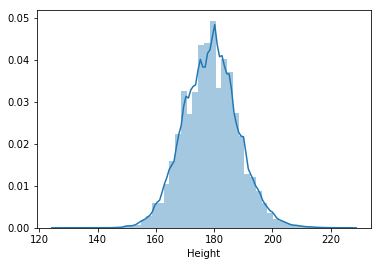

In [75]:
male_height = olympics[olympics.Sex == 'M']
male_height = male_height.dropna(subset=['Height'])
sns.distplot(male_height.Height)

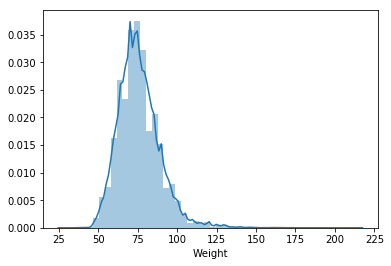

In [76]:
male_weight = olympics[olympics.Sex == 'M']
male_weight = male_weight.dropna(subset=['Weight'])
sns.distplot(male_weight.Weight)

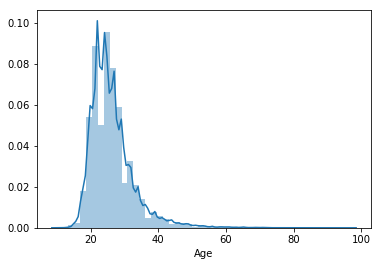

In [77]:
male_age = olympics[olympics.Sex == 'M']
male_age = male_age.dropna(subset=['Age'])
sns.distplot(male_age.Age)

The plot for male height appears to be normally distributed, while the graph for weight seems to skew to the left (less heavy males), and the graph for weight definitely skews to the left, meaning more younger athletes.

### Q3 Which female athlete competed in the most number of events? (5pt)
In which events did the athelete participate, and for what range of years? Which country did the athlete represent?

In [78]:
female_athletes = olympics[olympics['Sex'] == 'F']
female_athletes['Name'].value_counts().head(1)

Oksana Aleksandrovna Chusovitina    29
Name: Name, dtype: int64

In [79]:
top_dog = female_athletes[female_athletes.Name == 'Oksana Aleksandrovna Chusovitina']
min_year = top_dog.Year.min()
max_year = top_dog.Year.max()
countries = top_dog.Team.unique()
events = top_dog.Event.unique()

print(min_year)
print(max_year)
print(countries)
print(events)

1992
2016
['Unified Team' 'Uzbekistan' 'Germany']
["Gymnastics Women's Individual All-Around"
 "Gymnastics Women's Team All-Around" "Gymnastics Women's Floor Exercise"
 "Gymnastics Women's Horse Vault" "Gymnastics Women's Uneven Bars"
 "Gymnastics Women's Balance Beam"]


Oksana Aleksandrovna Chusovitina competed in the most number of events in the Olympics, competing 29 times in 6 different events from 1992-2016. Her events were all in gymnastics, which explains why she was in so many different events, as gymnasts usually compete in a variety of events. She competed in the Gymnastics Women's Individual All-Around, the Gymnastics Women's Team All-Around, the Gymnastics Women's Floor Exercise, the Gymnastics Women's Horse Vault, the Gymnastics Women's Uneven Bars, and the Gymnastics Women's Balance Beam. She represented 3 different countries' teams during this time (in order): the Unified Team (of the former Soviet Union), Uzbekistan, and Germany.

To get this information, I first found the name of the female that showed up the most in the dataset, and then to get her information, I took the max and min of the Year column to get her start and end year, and then looked for her unique events and teams to get that information.

### Q4 Which sport has the lowest median athlete age? (5pt)
To determine this, you might want to calculate and plot the median age for each sport. You may want to sort the axes appropriately for your analysis.

In [80]:
sport_ages = olympics.groupby('Sport').median()
youngest_sport = sport_ages['Age'].sort_values(ascending=True)
youngest_sport.head()

Sport
Rhythmic Gymnastics      18.0
Swimming                 20.0
Synchronized Swimming    22.0
Figure Skating           22.0
Diving                   22.0
Name: Age, dtype: float64

Rhyhtmic Gymnastics is the sport with the lowest median athlete age. To get this, I grouped the dataset by sport, and then took the median, which gave me the median of all the numeric columns for each sport. Then I took the Age column and put it in ascending order, which put the smallest (or youngest) on top. I displayed the top 5 here to ensure that there were no ties for the youngest median athlete age.

### Q5 Which countries have more female medalists than male medalists? (5pt)

In [81]:
import re

In [82]:
def cleaning_dashes(team):
    return team.replace('-','')

def cleaning_nums(team):
    return re.sub(r'[0-9]+', '', team)

In [83]:
q5o = olympics.copy()
meds = q5o.dropna(subset=['Medal'])

m_meds = meds[meds.Sex == 'M'].groupby('Team').Medal.count()
m_meds_df = pd.DataFrame(m_meds)
m_meds_df = m_meds_df.reset_index()
m_meds_df['Team'] = m_meds_df['Team'].apply(cleaning_dashes)
m_meds_df['Team'] = m_meds_df['Team'].apply(cleaning_nums)
m_meds_df = m_meds_df.groupby('Team').Medal.sum()
m_meds_df = pd.DataFrame(m_meds_df)
# m_meds_df

f_meds = meds[meds.Sex == 'F'].groupby('Team').Medal.count()
f_meds_df = pd.DataFrame(f_meds)
f_meds_df = f_meds_df.reset_index()
f_meds_df['Team'] = f_meds_df['Team'].apply(cleaning_dashes)
f_meds_df['Team'] = f_meds_df['Team'].apply(cleaning_nums)
f_meds_df = f_meds_df.groupby('Team').Medal.sum()
f_meds_df = pd.DataFrame(f_meds_df)
# f_meds_df

In [84]:
all_together = m_meds_df.merge(f_meds_df, on='Team', how='right') 
# all_together = all_together.reset_index()
all_together.head()

# Medal_x is the males, Medal_y is the females

,Medal_x,Medal_y
Team,,
Algeria,14.0,3
Ancora,3.0,1
Argentina,193.0,73
Armenia,15.0,1
Australasia,27.0,2


In [85]:
all_together[all_together.Medal_x < all_together.Medal_y]

,Medal_x,Medal_y
Team,,
Belarus,62.0,77
China,335.0,654
Jamaica,71.0,86
Liechtenstein,4.0,5
North Korea,33.0,34
Peru,3.0,12
Romania,298.0,355
Singapore,2.0,7
Ukraine,94.0,105


The countries with more female medalists than male ones are Belarus, China, Jamaica, Liechtenstein, North Korea, Peru, Romania, Singapore, and Ukraine. Initially, I got these just by dropping the people without any medals, selecting all the males/females and grouping by sport and getting the counts for each sport. After seeign the results though, I realized that some teams were listed in several different portions, like China, China-1, and China-2. After looking at the Kaggle page and finding to reason for this, I decided to go back and clean up the team names, getting rid of any dashes and numbers and combining the results back down in to one country. This led me to the 9 countries listed above.

### Q6 Which country won the most medal points in the 2010 Winter Olympics? (5pt)
Rank each country by a score, where 3 points are assigned for a gold medal, 2 points for silver, and 1 point for bronze.

In [86]:
q6o = olympics.copy() 
q6o = q6o[q6o.Games == "2010 Winter"]

"""This is a function to convert medals into points"""
def to_points(medal):
    p = 0
    if medal == 'Gold':
        p = 3
    if medal == 'Silver':
        p = 2
    if medal == 'Bronze':
        p = 1
    return p

q6o['medal_points'] = q6o.Medal.apply(to_points)

q6o_counts = q6o.groupby('Team').sum()
q6o_counts['medal_points'].sort_values(ascending=False).head()

Team
Canada           219
United States    166
Germany           86
Norway            85
Austria           51
Name: medal_points, dtype: int64

The country that won the most medals in the 2010 Winter Olympics was Canada 🇨🇦(home of Chris). To get this, I first narrowed down the dataset to only show me results from the 2010 Winter Olympics. Then, I created a function to convert medals into points, and applied that to the dataset, storing it in a new column. Then I grouped the dataframe by Team, and summed up the numeric values for each Team. I then sorted the dataframe by medal points so the largest one would appear first, and showed the top 5 to ensure that there were to ties for most medals points. 

### BONUS 5 pt: For each year in which games were held, what proportion of gold medals did the host country win? 
You will need to combine multiple datasets to complete the analysis.  We suggest using the following resource:
- https://en.wikipedia.org/wiki/List_of_Olympic_Games_host_cities (note: you can use the [read_html](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_html.html) function to load the data into a DataFrame.

In [87]:
# put your code here

(Use this space to explain your answers)

## Please submit your completed notebook in HTML format via Canvas.

Kelsey Toporski, ktops